# Fortune 500 (2017)

### 

In [738]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [739]:
companies = pd.read_csv('fortune_2015_2017.csv')

In [740]:
companies.columns = ['rank', 'title', 'website', 'employees', 'sector', 'industry',\
       'hqlocation', 'hqaddr', 'hqcity', 'hqstate', 'hqzip', 'hqtel', 'ceo',\
       'ceo-title', 'address', 'ticker', 'fullname', 'revenues', 'revchange',\
       'profits', 'prftchange', 'assets', 'totshequity']

In [741]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
rank           500 non-null int64
title          500 non-null object
website        500 non-null object
employees      500 non-null int64
sector         500 non-null object
industry       500 non-null object
hqlocation     500 non-null object
hqaddr         500 non-null object
hqcity         500 non-null object
hqstate        500 non-null object
hqzip          500 non-null int64
hqtel          500 non-null object
ceo            500 non-null object
ceo-title      500 non-null object
address        500 non-null object
ticker         500 non-null object
fullname       500 non-null object
revenues       500 non-null int64
revchange      500 non-null float64
profits        500 non-null float64
prftchange     500 non-null object
assets         500 non-null int64
totshequity    500 non-null float64
dtypes: float64(3), int64(5), object(15)
memory usage: 89.9+ KB


In [742]:
info = ['ticker','fullname','ceo','employees', 'sector', 'industry','hqcity', 'hqstate', 'hqzip','hqtel']

finance = ['ticker','fullname','revenues', 'revchange','profits', 'prftchange', 'assets', 'totshequity']

# By Sector

## 1. Counts by Sectors

In [743]:
#Counts by Sector
counts_by_sector = companies.groupby('sector')[['employees']].count().reset_index()
counts_by_sector.columns = ['sector','count']

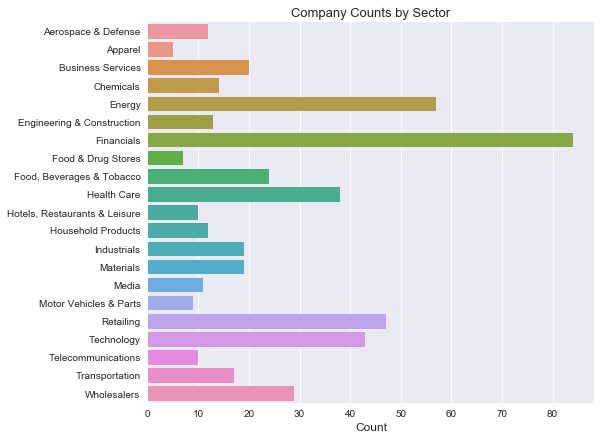

In [744]:
#Plot Total Assets by Sector
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='count', y='sector', data=counts_by_sector)
_ = plt.title('Company Counts by Sector', size=13)
_ = plt.xlabel('Count', size=12)
_ = plt.ylabel('', size=12)

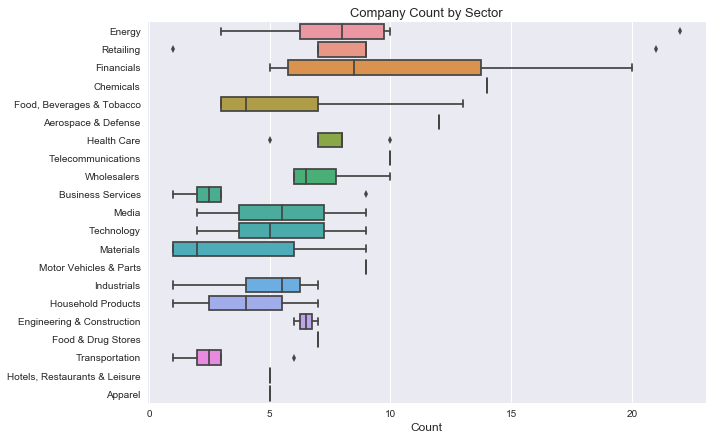

In [805]:
#Average by Sector and Industry
counts_by_industry = companies.groupby(['sector','industry'])[['employees']].count().sort_values('employees', ascending=False).reset_index()
counts_by_industry.columns = ['sector','industry','count']

#Plot Company Count Barplot
_ = plt.figure(figsize=(10,7))
_ = sns.boxplot(x='count', y='sector', data=counts_by_industry)
_ = plt.title('Company Count by Sector', size=13)
_ = plt.xlabel('Count', size=12)
_ = plt.ylabel('')

## 1. Assets by Sectors

In [746]:
#Sum by sector 
total_assets_by_sector = companies.groupby(['sector']).sum()[['assets']].reset_index()
total_assets_by_sector.columns = ['sector','total_assets']

In [747]:
#Merge New Feature
by_sector = counts_by_sector.merge(total_assets_by_sector)

### a) Total Assets By Sector w/ Outlier

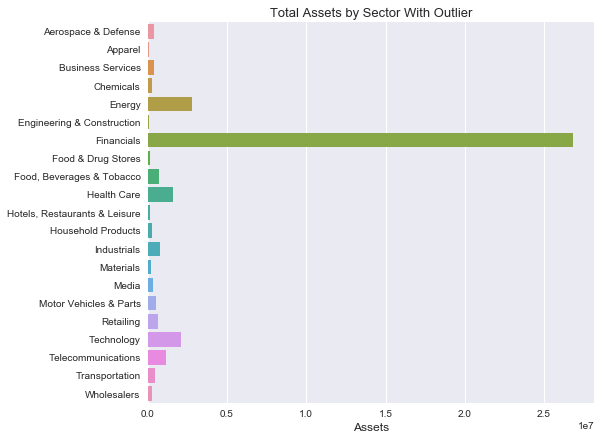

In [760]:
#Plot Total Assets by Sector
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='total_assets', y='sector', data=total_assets_by_sector)
_ = plt.title('Total Assets by Sector With Outlier', size=13)
_ = plt.xlabel('Assets', size=12)
_ = plt.ylabel('', size=12)

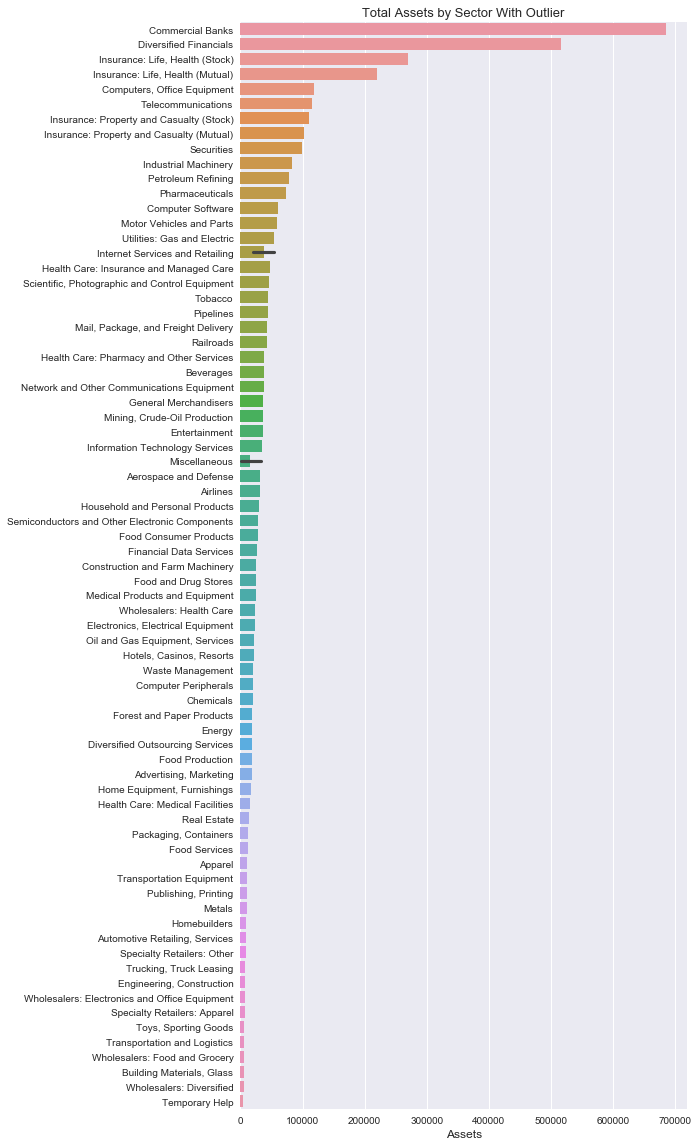

In [816]:
#Plot Total Assets by Sector
_ = plt.figure(figsize=(8,20))
_ = sns.barplot(x='count', y='industry', data=assets_by_industry)
_ = plt.title('Total Assets by Sector With Outlier', size=13)
_ = plt.xlabel('Assets', size=12)
_ = plt.ylabel('', size=12)

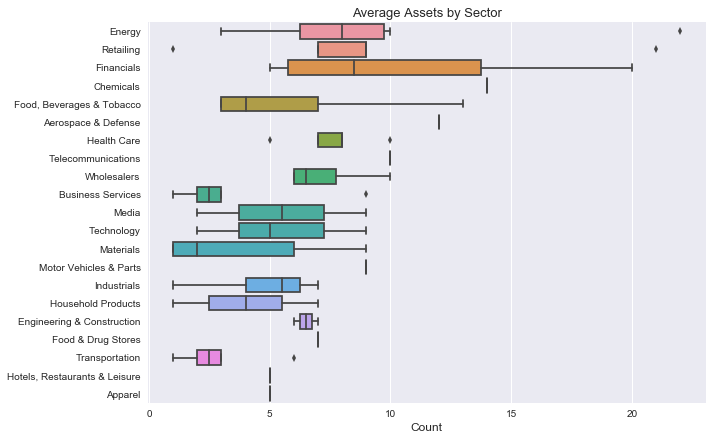

In [810]:
#Average by Sector and Industry
assets_by_industry = companies.groupby(['sector','industry'])[['assets']].mean().sort_values('assets', ascending=False).reset_index()
assets_by_industry.columns = ['sector','industry','count']

#Plot Company Count Barplot
_ = plt.figure(figsize=(10,7))
_ = sns.boxplot(x='count', y='sector', data=counts_by_industry)
_ = plt.title('Average Assets by Sector', size=13)
_ = plt.xlabel('Count', size=12)
_ = plt.ylabel('')

### b) Total Assets by Sector w/o Outlier

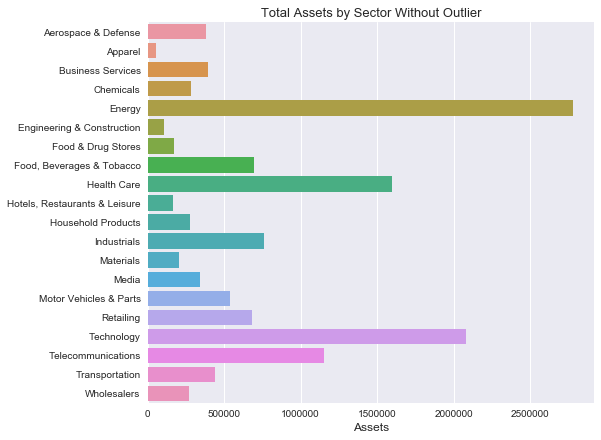

In [763]:
#Total Assets Without Outlier
asset_without_outlier_sector = total_assets_by_sector[total_assets_by_sector.sector != 'Financials']
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='total_assets', y='sector', data=asset_without_outlier_sector)
_ = plt.title('Total Assets by Sector Without Outlier', size=13)
_ = plt.xlabel('Assets', size=12)
_ = plt.ylabel('', size=12)

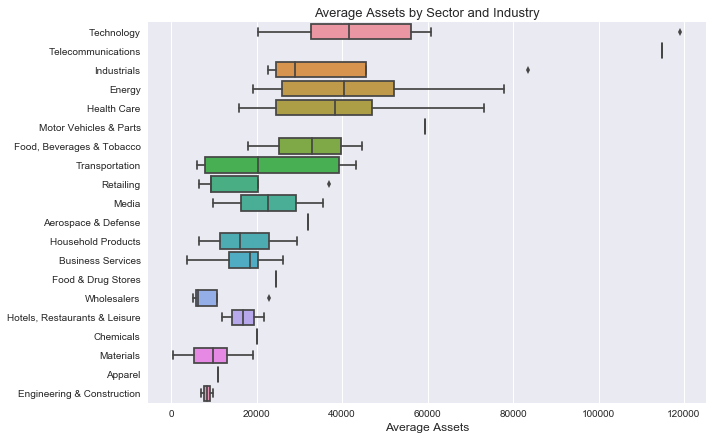

In [809]:
#Average by Sector and Industry
assets_by_industry = companies.groupby(['sector','industry'])[['assets']].mean().sort_values('assets', ascending=False).reset_index()
assets_by_industry.columns = ['sector','industry','count']
asset_without_outlier_industry = assets_by_industry[assets_by_industry.sector != 'Financials']

#Plot Company Count Barplot
_ = plt.figure(figsize=(10,7))
_ = sns.boxplot(x='count', y='sector', data=asset_without_outlier_industry)
_ = plt.title('Average Assets by Sector and Industry', size=13)
_ = plt.xlabel('Average Assets', size=12)
_ = plt.ylabel('')

### Question: How big is this outlier (The Financial Sector)?!?!?

In [766]:
#Percent Of All Assets
total_financial_assets = total_assets_by_sector[total_assets_by_sector.sector == 'Financials']['total_assets']
total_assets = total_assets_by_sector.sum()['total_assets']

print(total_financial_assets / total_assets)

6    0.667168
Name: total_assets, dtype: float64


#### Financial Sector Holds 66.7% Of All Assets Of The Fortune 500 Companies.

### Answer: The Financial Sector has 2/3 of Assets all assets in the Fortune 500. 

In [768]:
#Financial Sector Assets
financial_assets = total_assets_by_sector[total_assets_by_sector.sector == 'Financials']

#All Other Assets (Sum)
other = {'sector':'Other','total_assets':total_assets_by_sector[~total_assets_by_sector.sector.isin(top_5_sectors.sector)].sum()['total_assets']}

#Put Together
sector_data = financial_assets.append(other,ignore_index=True)

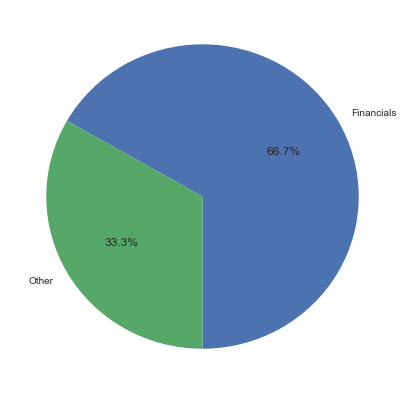

In [770]:
labels = sector_data['sector']
sizes = sector_data['total_assets']

_ = plt.figure(figsize=(7,7))
_ = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=270)
_ = plt.title('', size=15)

### c) Average Assets by Sectors (w/ Outlier)

In [772]:
#Sum by sector 
average_assets_by_sector = companies.groupby(['sector']).mean()[['assets']].reset_index()
average_assets_by_sector.columns= ['sector','avg_assets']

In [773]:
#Merge New Feature
by_sector = by_sector.merge(average_assets_by_sector)

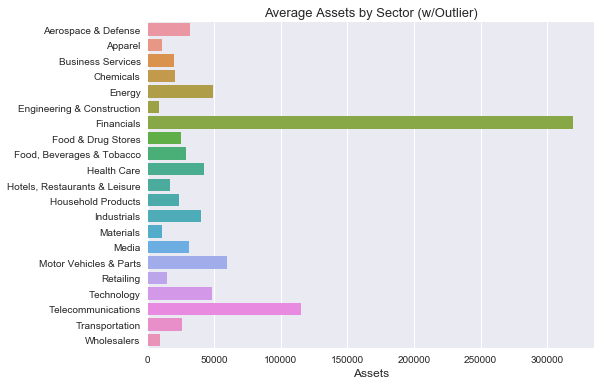

In [774]:
#Plot Total Assets by Sector
_ = plt.figure(figsize=(8,6))
_ = sns.barplot(x='avg_assets', y='sector', data=average_assets_by_sector)
_ = plt.title('Average Assets by Sector (w/Outlier)', size=13)
_ = plt.xlabel('Assets', size=12)
_ = plt.ylabel('', size=12)

### d) Average Assets by Sectors (No Outlier)

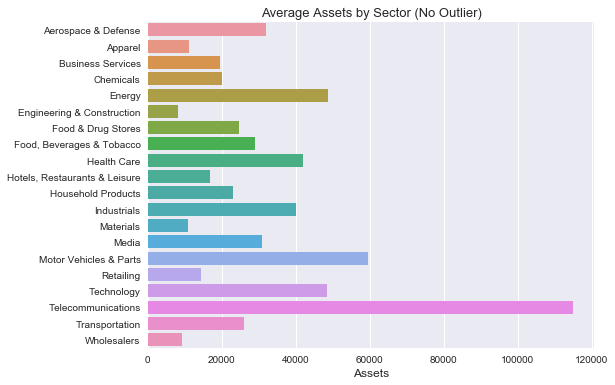

In [775]:
#Plot Average Assets by Sector
avg__assets_by_sector_no_outlier = average_assets_by_sector[average_assets_by_sector.sector != 'Financials']
_ = plt.figure(figsize=(8,6))
_ = sns.barplot(x='avg_assets', y='sector', data=avg__assets_by_sector_no_outlier)
_ = plt.title('Average Assets by Sector (No Outlier)', size=13)
_ = plt.xlabel('Assets', size=12)
_ = plt.ylabel('', size=12)

## 2. Revenue by Sectors

### a) Total Revenue by Sectors

In [777]:
#Sum by sector 
total_revenue_by_sector = companies.groupby(['sector'])[['revenues']].sum().reset_index()
total_revenue_by_sector.columns = ['sector','total_revenue']

In [778]:
#Merge New Feature
by_sector = by_sector.merge(total_revenue_by_sector)

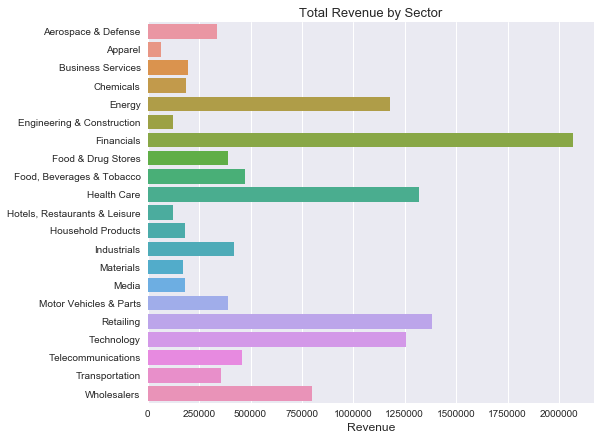

In [780]:
#Plot Total Assets by Sector
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='total_revenue', y='sector', data=total_revenue_by_sector)
_ = plt.title('Total Revenue by Sector', size=13)
_ = plt.xlabel('Revenue', size=12)
_ = plt.ylabel('', size=12)

### b) Average Revenue by Sector

In [781]:
#Mean by Sector
avg_revenue_by_sector = companies.groupby('sector')[['revenues']].mean().reset_index()
avg_revenue_by_sector.columns = ['sector','avg_revenues']

In [782]:
#Merge New Feature
by_sector = by_sector.merge(avg_revenue_by_sector)

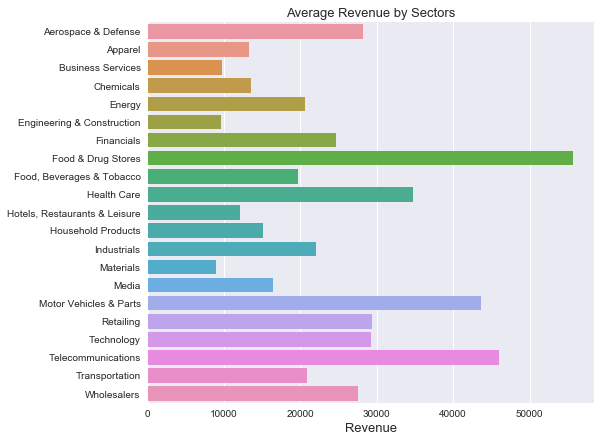

In [783]:
#Plot Average Revenue by Secgtor
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='avg_revenues', y='sector', data=avg_revenue_by_sector)
_ = plt.title("Average Revenue by Sectors", size=13)
_ = plt.xlabel("Revenue", size=13)
_ = plt.ylabel("")

## 3. Revenue Change by Sector

### a) Total Revenue Change by Sector

In [784]:
#Average Revenue Change
total_revchange_by_sector = companies.groupby(['sector'])[['revchange']].sum().reset_index()
total_revchange_by_sector.columns = ['sector','total_revchange']

In [785]:
#Merge New Feature
by_sector = by_sector.merge(total_revchange_by_sector)

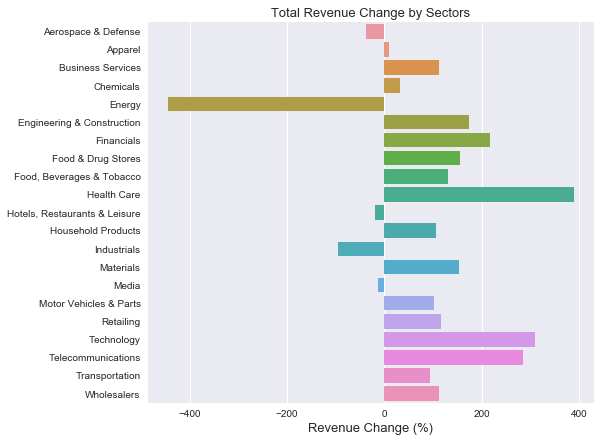

In [786]:
#Plot Total Revenue Change by Secgtor
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='total_revchange', y='sector', data=total_revchange_by_sector)
_ = plt.title("Total Revenue Change by Sectors", size=13)
_ = plt.xlabel("Revenue Change (%)", size=13)
_ = plt.ylabel("")

### b) Average Revenue Change by Sector

In [787]:
#Average Revenue Change
avg_revchange_by_sector = companies.groupby(['sector'])[['revchange']].mean().reset_index()
avg_revchange_by_sector.columns = ['sector','avg_revchange']

In [788]:
#Merge New Feature
by_sector = by_sector.merge(avg_revchange_by_sector)

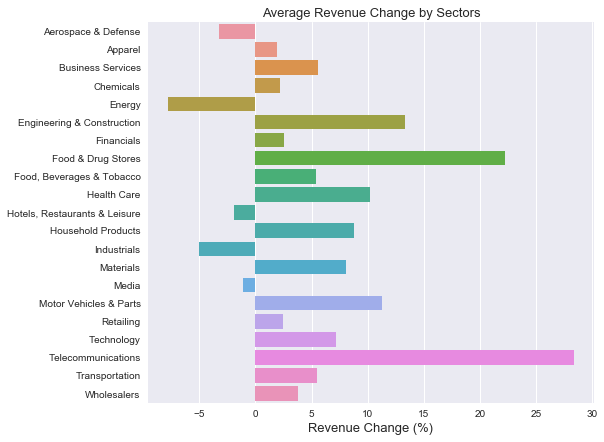

In [789]:
#Plot Average Revenue Change by Secgtor
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='avg_revchange', y='sector', data=avg_revchange_by_sector)
_ = plt.title("Average Revenue Change by Sectors", size=13)
_ = plt.xlabel("Revenue Change (%)", size=13)
_ = plt.ylabel("")

## 4. Profits by Sectors

### a) Total Profit by Sector

In [790]:
#Sum by sector 
total_profits_by_sector = companies.groupby(['sector'])[['profits']].sum().reset_index()
total_profits_by_sector.columns = ['sector','total_profits']

In [791]:
#Merge New Feature
by_sector = by_sector.merge(total_profits_by_sector)

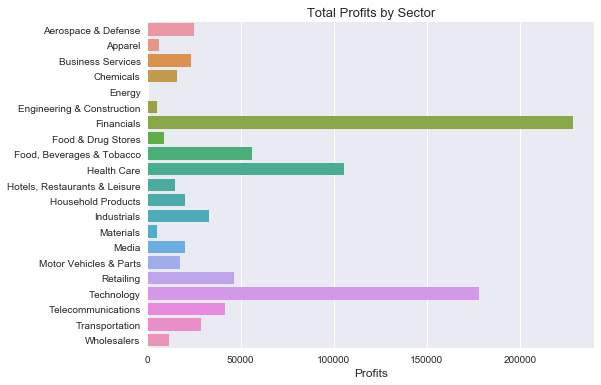

In [792]:
#Plot Total Assets by Sector
_ = plt.figure(figsize=(8,6))
_ = sns.barplot(x='total_profits', y='sector', data=total_profits_by_sector)
_ = plt.title('Total Profits by Sector', size=13)
_ = plt.xlabel('Profits', size=12)
_ = plt.ylabel('', size=12)

### b) Average Profit by Sector

In [793]:
#Average by sector 
average_profit_by_sector = companies.groupby(['sector'])[['profits']].mean().reset_index()
average_profit_by_sector.columns = ['sector','avg_profits']

In [794]:
#Merge New Feature
by_sector = by_sector.merge(average_profit_by_sector)

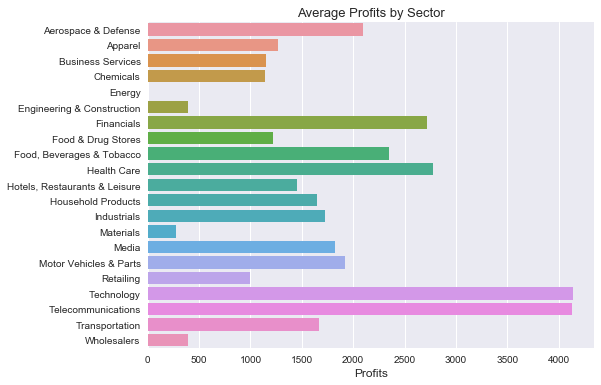

In [795]:
#Plot Average Profit by Sector
_ = plt.figure(figsize=(8,6))
_ = sns.barplot(x='avg_profits', y='sector', data=average_profit_by_sector)
_ = plt.title('Average Profits by Sector', size=13)
_ = plt.xlabel('Profits', size=12)
_ = plt.ylabel('', size=12)

## 5. Profit Change (%) by Sector

In [796]:
companies['prftchange'] = companies['prftchange'].str.replace(",","")
companies['prftchange'] = pd.to_numeric(companies['prftchange'])

### a) Total Profit Change by Sector

In [797]:
#Average Profit Change by Sector
total_prftchange_by_sector = companies.groupby(['sector'])[['prftchange']].mean().reset_index()
total_prftchange_by_sector.columns = ['sector','total_prftchange']

In [798]:
#Merge New Feature
by_sector = by_sector.merge(total_prftchange_by_sector)

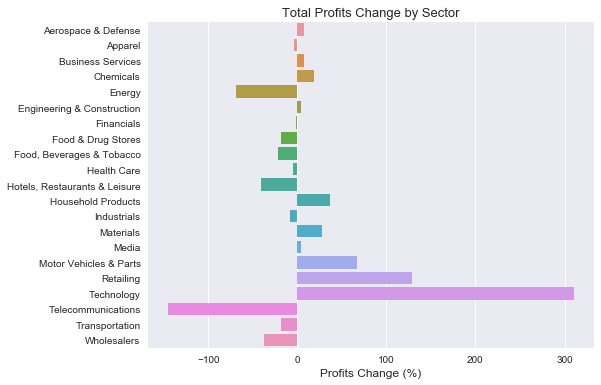

In [799]:
#Plot Average Profit Change by Sector
_ = plt.figure(figsize=(8,6))
_ = sns.barplot(x='total_prftchange', y='sector', data=total_prftchange_by_sector)
_ = plt.title('Total Profits Change by Sector', size=13)
_ = plt.xlabel('Profits Change (%)', size=12)
_ = plt.ylabel('', size=12)

### b) Average Profit Change by Sector

In [800]:
#Average Profit Change by Sector
avg_prftchange_by_sector = companies.groupby(['sector'])[['prftchange']].mean().reset_index()
avg_prftchange_by_sector.columns = ['sector','avg_prftchange']

In [801]:
#Merge New Feature
by_sector = by_sector.merge(avg_prftchange_by_sector)

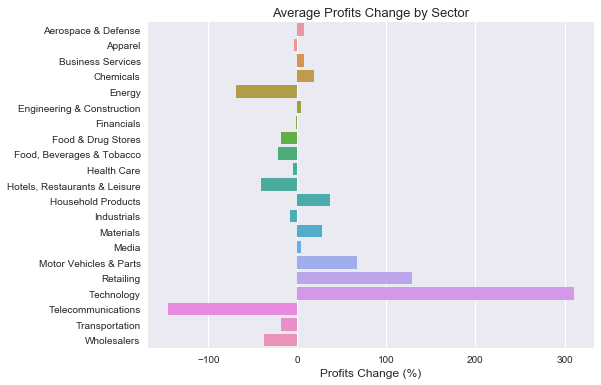

In [802]:
#Plot Average Profit Change by Sector
_ = plt.figure(figsize=(8,6))
_ = sns.barplot(x='avg_prftchange', y='sector', data=avg_prftchange_by_sector)
_ = plt.title('Average Profits Change by Sector', size=13)
_ = plt.xlabel('Profits Change (%)', size=12)
_ = plt.ylabel('', size=12)

## 4. Employees by Sector

### a) Total Employees by Sector

In [550]:
#Total Employees by Sector
total_employees_by_sector = companies.groupby('sector')[['employees']].sum().reset_index()
total_employees_by_sector.columns = ['sector','total_employees']

In [551]:
#Merge New Feature
by_sector = by_sector.merge(total_employees_by_sector)

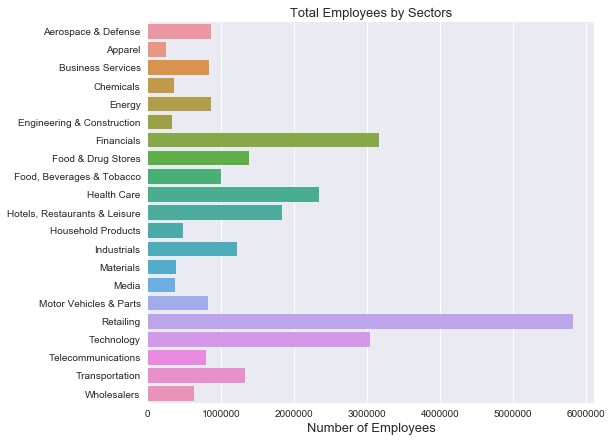

In [512]:
#Plot Average Employees by Sector
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='employees', y='sector', data=total_employees_by_sector)
_ = plt.title("Total Employees by Sectors", size=13)
_ = plt.xlabel("Number of Employees", size=13)
_ = plt.ylabel("")

### b) Average Employees by Sector

In [552]:
#Average Employees by Sector
avg_employees_by_sector = companies.groupby('sector')[['employees']].mean().reset_index()
avg_employees_by_sector.columns = ['sector','avg_employees']

In [553]:
#Merge New Feature
by_sector = by_sector.merge(avg_employees_by_sector)

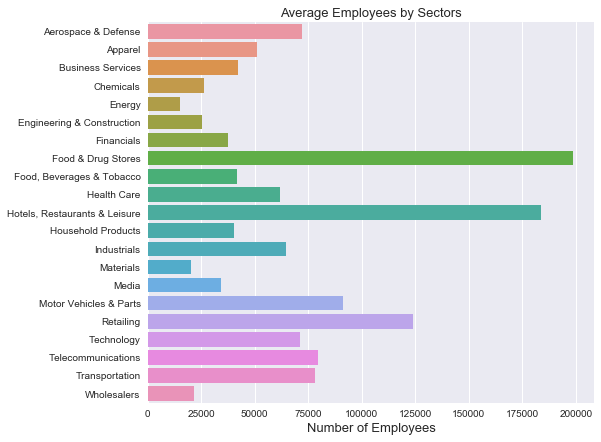

In [509]:
#Plot Average Employees by Sector
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='employees', y='sector', data=avg_employees_by_sector)
_ = plt.title("Average Employees by Sectors", size=13)
_ = plt.xlabel("Number of Employees", size=13)
_ = plt.ylabel("")

### c) Value Per Employee
#### Potential Definitions Value:
- <strong>By Revenue:</strong> Revenue Per Employee
- <strong>By Profits:</strong> Profits Per Employee
- <strong>By Assets:</strong> Assets Per Employee

#### Final Verdict
After analysis, concluded that definding Profits per Employee as the metric for Value is the best approach.
- Value = Profit per Employee

In [654]:
#Average Profit by Sector
value_by_sector = companies.groupby('sector')[['profits']].mean().reset_index()
value_by_sector.columns = ['sector','employee_value']

In [655]:
#Merge New Feature
by_sector = by_sector.merge(value_by_sector)

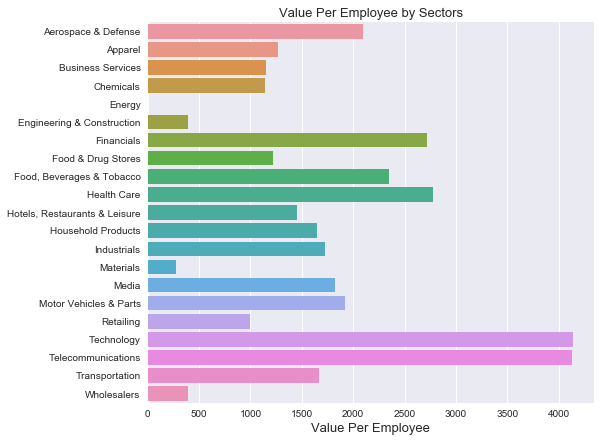

In [572]:
#Plot Average Revenue Change by Secgtor
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='value', y='sector', data=value_by_sector)
_ = plt.title("Value Per Employee by Sectors", size=13)
_ = plt.xlabel("Value Per Employee", size=13)
_ = plt.ylabel("")

## 5. Total Share Equity by Sector

### a) Total Total Share Equity by Sector

In [644]:
#Total Total Share Equity by Sector
total_totshequity_by_sector = companies.groupby('sector')[['totshequity']].sum().reset_index()
total_totshequity_by_sector.columns = ['sector','total_ttshequity']

In [649]:
#Merge New Feature
by_sector = by_sector.merge(total_totshequity_by_sector)

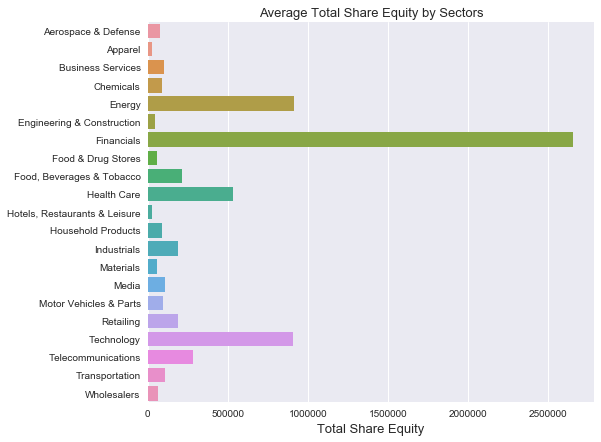

In [646]:
#Plot Average Revenue Change by Secgtor
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='total_ttshequity', y='sector', data=total_totshequity_by_sector)
_ = plt.title("Average Total Share Equity by Sectors", size=13)
_ = plt.xlabel("Total Share Equity", size=13)
_ = plt.ylabel("")

### b) Average Total Share Equity by Sector

In [650]:
#Average Total Share Equity by Sector
avg_totshequity_by_sector = companies.groupby('sector')[['totshequity']].mean().reset_index()
avg_totshequity_by_sector.columns = ['sector','avg_totshequity']

In [651]:
#Merge New Feature
by_sector = by_sector.merge(avg_totshequity_by_sector)

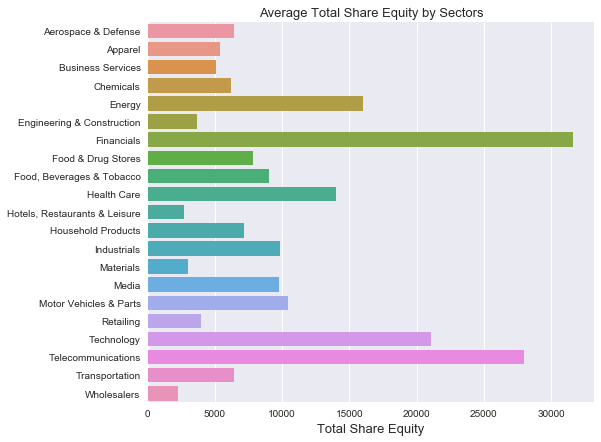

In [652]:
#Plot Average Revenue Change by Secgtor
_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='totshequity', y='sector', data=average_totshequity_by_sector)
_ = plt.title("Average Total Share Equity by Sectors", size=13)
_ = plt.xlabel("Total Share Equity", size=13)
_ = plt.ylabel("")

# Relationships by Sector/Industry

### Correlation: Industry Averages

In [593]:
#Averages by Industry 
averages_by_industry = companies.groupby(['sector','industry']).mean().reset_index()

In [641]:
averages_by_industry.corr()

,rank,employees,hqzip,revenues,revchange,profits,prftchange,assets,totshequity
rank,1.000000,-0.447959,0.154370,-0.723563,0.059320,-0.457452,-0.024912,-0.245760,-0.385628
employees,-0.447959,1.000000,-0.054667,0.505136,-0.027139,0.188932,0.148352,-0.018771,0.027534
hqzip,0.154370,-0.054667,1.000000,0.003991,-0.080587,-0.089231,-0.072896,-0.210692,0.013811
revenues,-0.723563,0.505136,0.003991,1.000000,0.040233,0.458731,0.016209,0.196988,0.416201
revchange,0.059320,-0.027139,-0.080587,0.040233,1.000000,0.163611,0.060046,-0.055018,-0.017800
profits,-0.457452,0.188932,-0.089231,0.458731,0.163611,1.000000,0.107746,0.347953,0.561182
prftchange,-0.024912,0.148352,-0.072896,0.016209,0.060046,0.107746,1.000000,-0.030659,-0.019345
assets,-0.245760,-0.018771,-0.210692,0.196988,-0.055018,0.347953,-0.030659,1.000000,0.680533
totshequity,-0.385628,0.027534,0.013811,0.416201,-0.017800,0.561182,-0.019345,0.680533,1.000000


# By Rank

## 1. Employee vs Rank

### a) Employees vs Rank (with Outlier)

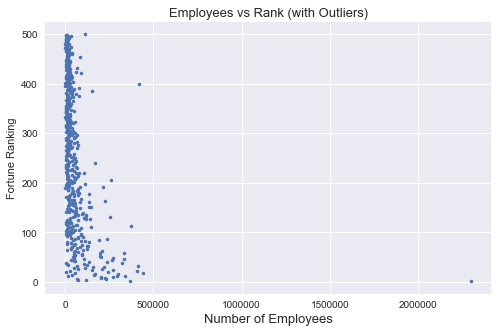

In [660]:
_ = plt.figure(figsize=(8,5))
_ = plt.plot(companies['employees'], companies['rank'], linestyle='none', marker='.')
_ = plt.title("Employees vs Rank (with Outliers)", size=13)
_ = plt.xlabel("Number of Employees", size=13)
_ = plt.ylabel("Fortune Ranking")

### b) Find Outlier

In [661]:
companies.sort_values('employees', ascending=False)[['ticker','fullname','employees']].head()

,ticker,fullname,employees
0,WMT,"Wal-Mart Stores, Inc.",2300000
17,KR,The Kroger Company,443000
398,YUMC,"Yum China Holdings, Inc.",420000
31,IBM,International Business Machines Corporation,414400
22,HD,"The Home Depot, Inc.",406000


### c) Employees vs Rank (No Outlier)

In [662]:
#Take Out Outlier
no_employee_outliers = companies[companies.ticker != 'WMT']

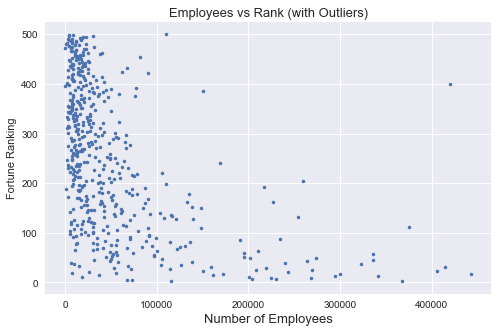

In [663]:
#Plot Employees without Outliers
_ = plt.figure(figsize=(8,5))
_ = plt.plot(no_employee_outliers['employees'], no_employee_outliers['rank'], linestyle='none', marker='.')
_ = plt.title("Employees vs Rank (with Outliers)", size=13)
_ = plt.xlabel("Number of Employees", size=13)
_ = plt.ylabel("Fortune Ranking")

### Observation: 
- Lower Ranking, Less Employees, Lower Variance. 
- Higher Ranking, More Employees?, High Variance.

## 2. Revenue vs Rank

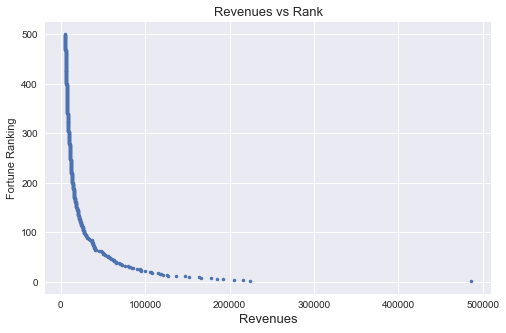

In [691]:
_ = plt.figure(figsize=(8,5))
_ = plt.plot(companies['revenues'], companies['rank'], linestyle='none', marker='.')
_ = plt.title("Revenues vs Rank", size=13)
_ = plt.xlabel("Revenues", size=13)
_ = plt.ylabel("Fortune Ranking")

## 3. Profits vs Rank

#### Observations
- Negative, Non-linear Relationship
- Lower Rank, Lower Profit, Lower Variance
- Higher Rank, Higher Profit, Higher Variance

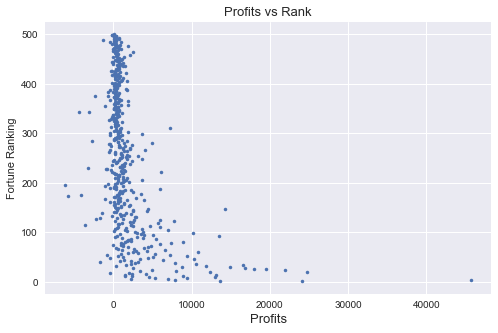

In [687]:
_ = plt.figure(figsize=(8,5))
_ = plt.plot(companies['profits'], companies['rank'], linestyle='none', marker='.')
_ = plt.title("Profits vs Rank", size=13)
_ = plt.xlabel("Profits", size=13)
_ = plt.ylabel("Fortune Ranking")

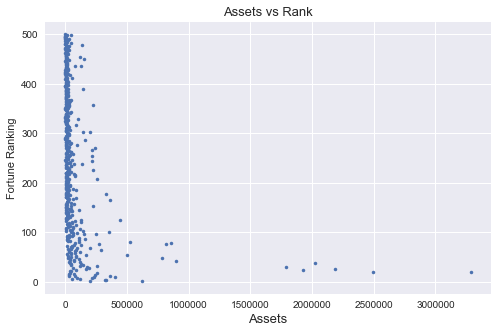

In [692]:
_ = plt.figure(figsize=(8,5))
_ = plt.plot(companies['assets'], companies['rank'], linestyle='none', marker='.')
_ = plt.title("Assets vs Rank", size=13)
_ = plt.xlabel("Assets", size=13)
_ = plt.ylabel("Fortune Ranking")

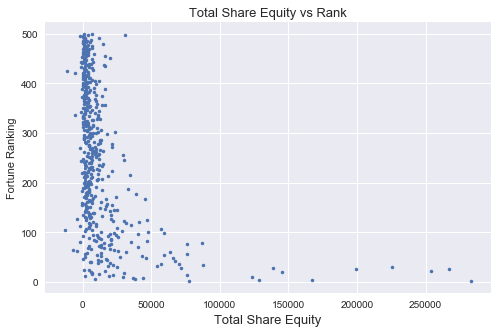

In [693]:
_ = plt.figure(figsize=(8,5))
_ = plt.plot(companies['totshequity'], companies['rank'], linestyle='none', marker='.')
_ = plt.title("Total Share Equity vs Rank", size=13)
_ = plt.xlabel("Total Share Equity", size=13)
_ = plt.ylabel("Fortune Ranking")

## 4. Total Share Equity vs Assets

In [ ]:
#Plot Employees without Outliers
_ = plt.figure(figsize=(8,5))
_ = plt.plot(no_employee_outliers['employees'], no_employee_outliers['rank'], linestyle='none', marker='.')
_ = plt.title("Employees vs Rank (with Outliers)", size=13)
_ = plt.xlabel("Number of Employees", size=13)
_ = plt.ylabel("Fortune Ranking")

In [686]:
averages_by_industry.head()

,sector,industry,rank,employees,hqzip,revenues,revchange,profits,prftchange,assets,totshequity
0,Aerospace & Defense,Aerospace and Defense,201.333333,71986.666667,25020.500000,28191.833333,-3.208333,2093.308333,8.050000,31897.666667,6425.750000
1,Apparel,Apparel,291.200000,50930.000000,34311.200000,13250.800000,1.940000,1263.700000,-3.960000,11064.800000,5394.400000
2,Business Services,"Advertising, Marketing",262.000000,64150.000000,10022.000000,11632.000000,2.500000,878.550000,19.450000,17825.000000,2089.500000
3,Business Services,Diversified Outsourcing Services,310.666667,128083.333333,12060.333333,10409.666667,-0.166667,612.500000,-0.066667,18844.333333,2539.000000
4,Business Services,Financial Data Services,338.555556,21544.444444,53431.111111,9028.000000,11.088889,1804.888889,-4.488889,26164.666667,7776.888889


# Interesting Features

## Looking at Revenue

In [701]:
companies.sort_values('revchange', ascending=False).head()

,rank,title,website,employees,sector,industry,hqlocation,hqaddr,hqcity,hqstate,...,ceo-title,address,ticker,fullname,revenues,revchange,profits,prftchange,assets,totshequity
95,96,Charter Communications,http://www.charter.com,91500,Telecommunications,Telecommunications,"Stamford, CT",400 Atlantic St.,Stamford,CT,...,Chairman & Chief Executive Officer,"400 Atlantic St., Stamford, CT 06901",CHTR,"Charter Communications, Inc.",29003,197.3,3522.0,2.4,149067,40139.0
207,208,Newell Brands,http://www.newellbrands.com,53400,Household Products,"Home Equipment, Furnishings","Hoboken, NJ",221 River St.,Hoboken,NJ,...,Chief Executive Officer & Director,"221 River St., Hoboken, NJ 07030",NWL,Newell Brands Inc.,13264,122.1,527.8,50.8,33838,11349.0
48,49,Albertsons Cos.,http://www.albertsons.com,274000,Food & Drug Stores,Food and Drug Stores,"Boise, ID",250 Parkcenter Blvd.,Boise,ID,...,Chairman & Chief Executive Officer,"250 Parkcenter Blvd., Boise, ID 83706",PRU,"Albertsons Companies, Inc.",58734,115.9,-502.2,-22.6,23770,1613.0
466,467,Olin,http://www.olin.com,6400,Chemicals,Chemicals,"Clayton, MO",190 Carondelet Plaza,Clayton,MO,...,"President, Chief Executive Officer & Director","190 Carondelet Plaza, Clayton, MO 63105",OLN,Olin Corporation,5551,94.5,-3.9,-16.2,8763,2273.0
426,427,TreeHouse Foods,http://www.treehousefoods.com,16027,"Food, Beverages & Tobacco",Food Consumer Products,"Oak Brook, IL",2021 Spring Rd.,Oak Brook,IL,...,Chairman & Chief Executive Officer,"2021 Spring Rd., Oak Brook, IL 60523",THS,"TreeHouse Foods, Inc.",6175,92.6,-228.6,-298.9,6546,2503.0


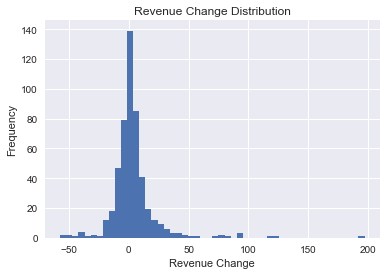

In [699]:
_ = plt.hist(companies.revchange, bins=50)
_ = plt.title('Revenue Change Distribution')
_ = plt.xlabel('Revenue Change')
_ = plt.ylabel('Frequency')

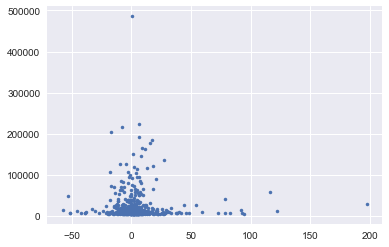

In [696]:
_ = plt.plot(companies.revchange, companies.revenues, linestyle='none', marker='.')

In [325]:
companies[finance].head()

,ticker,fullname,revenues,revchange,profits,prftchange,assets,totshequity
0,WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [694]:
companies[info].head()

,ticker,fullname,ceo,employees,sector,industry,hqcity,hqstate,hqzip,hqtel
0,WMT,"Wal-Mart Stores, Inc.",C. Douglas McMillon,2300000,Retailing,General Merchandisers,Bentonville,AR,72716,479-273-4000
1,BRKA,Berkshire Hathaway Inc.,Warren E. Buffett,367700,Financials,Insurance: Property and Casualty (Stock),Omaha,NE,68131,402-346-1400
2,AAPL,"Apple, Inc.",Timothy D. Cook,116000,Technology,"Computers, Office Equipment",Cupertino,CA,95014,408-996-1010
3,XOM,Exxon Mobil Corporation,Darren W. Woods,72700,Energy,Petroleum Refining,Irving,TX,75039,972-444-1000
4,MCK,McKesson Corporation,John H. Hammergren,68000,Wholesalers,Wholesalers: Health Care,San Francisco,CA,94104,415-983-8300


### Top 10 Fortune 500 Zipcodes

In [267]:
top_10_zipcodes = pd.DataFrame(companies.hqzip.value_counts()).reset_index().head(10)
top_10_zipcodes.columns = ['zipcode','count']

'''_ = plt.figure(figsize=(8,7))
_ = sns.barplot(x='zipcode', y='count', data=top_10_zipcodes)
_ = plt.title("Top 10 Fortune 500 Zipcodes", size=13)
_ = plt.xlabel("Count", size=13)
_ = plt.ylabel("")'''

'_ = plt.figure(figsize=(8,7))\n_ = sns.barplot(x=\'zipcode\', y=\'count\', data=top_10_zipcodes)\n_ = plt.title("Top 10 Fortune 500 Zipcodes", size=13)\n_ = plt.xlabel("Count", size=13)\n_ = plt.ylabel("")'

In [821]:
companies[companies.title.str.contains('racle')].ceo

80    Safra A. Catz, Mark V. Hurd
Name: ceo, dtype: object